## Kütüphaneleri yükleme

In [137]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor           
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('profiles.csv', low_memory = False)

### EDA

In [3]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [5]:
data.isna().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [6]:
data.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
data.describe(include = object)

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,8666,5761,9012,7215,8459,8667,8347,8049,7690,7879,7814,7352,7553,6361,7554,8565,8183,9514,9514,3886,9514,6352,6261,9514,7776,8596,9508,9514
unique,12,18,6,3,31,8664,8278,7921,7148,7872,7808,7112,7380,6290,7377,112,21,6763,89,15,3,15,45,2,48,5,1794,4
top,average,mostly anything,socially,never,graduated from college/university,ask me,enjoying it,listening,my smile,yes.,brevity.,my future,out with friends,nothing,you want to.,white,other,2012-06-29-22-56,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo and it&rsquo;s fun to think about,no,english,single
freq,2274,2621,6679,5972,3770,2,9,18,79,3,2,26,17,9,41,5278,1153,15,4835,1224,8191,2314,448,5675,277,7011,3415,8909


### Tekrarlanan satırları atalım

In [8]:
data.drop_duplicates(inplace = True)   

In [9]:
data

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t 

In [10]:
data.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
essay0          848
essay1         1168
essay2         1466
essay3         1825
essay4         1636
essay5         1701
essay6         2163
essay7         1962
essay8         3154
essay9         1961
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes          919
speaks            7
status            1
dtype: int64

## Şimdi gerekli olmayan sütunları silip gerekli olanları düzenleyelim

In [11]:
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [12]:
def drop_column(column):    ## sutunları silmek için fonksiyon
    data.drop(column, axis = 1, inplace = True)

In [13]:
for i in range(0, 10):   ## tum essaylari sildik.
    drop_column(f'essay{i}')

In [14]:
def fill_mean(column):
    data[column] = data[column].fillna(data[column].mean())

In [15]:
fill_mean('age')
fill_mean('height')
fill_mean('income')
data.isnull().sum()

age               0
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
ethnicity       950
height            0
income            0
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes          919
speaks            7
status            1
dtype: int64

## şimdi mode ile doldurabileceklerimizi dolduralım

### body_type

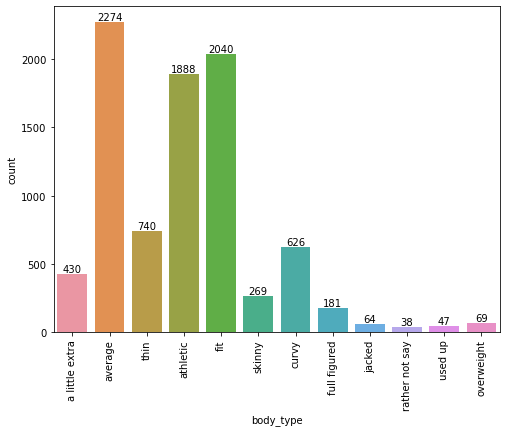

In [16]:
plt.figure(figsize = (8, 6))
ax = sbn.countplot(x = data.body_type)
ax.bar_label(ax.containers[0]);
plt.xticks(rotation = 90);

In [17]:
data['body_type'].dtype

dtype('O')

In [18]:
def fillmode(column):
    data[column].fillna(data[column].mode()[0], inplace = True)
    plt.figure(figsize = (8, 6))
    bx = sbn.countplot(x = data[column])
    bx.bar_label(bx.containers[0]);
    plt.xticks(rotation = 90);
    

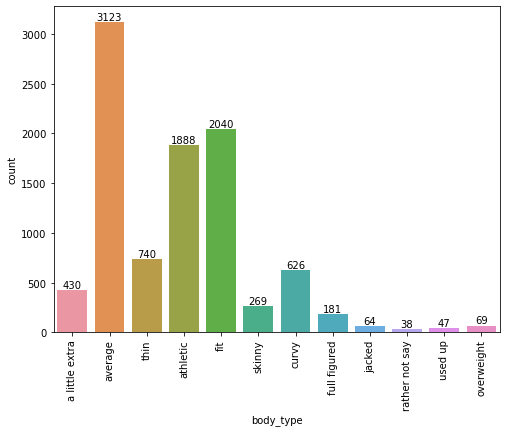

In [19]:
fillmode('body_type')

In [20]:
data.body_type.value_counts()

average           3123
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [21]:
d = {
    'average': ['average', 'curvy', 'a little extra', 'fully figured', 'used up'],
    'fit' : ['fit', 'thin', 'athletic', 'skinny', 'jacked'],
    'overweight' : ['overweight', 'rather not say']
}

data['body_type'] = data['body_type'].map({value: key for key, values in d.items() for value in values})

In [22]:
data.body_type.nunique()

3

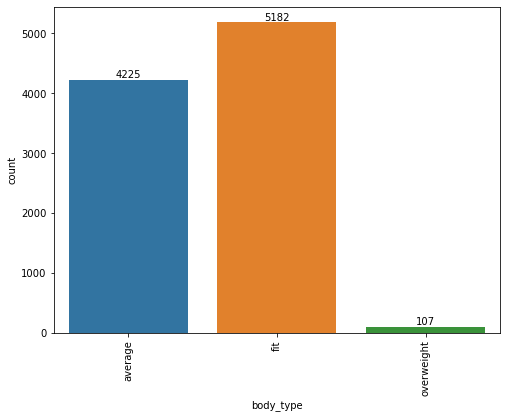

In [55]:
fillmode('body_type')

In [56]:
data.body_type.isnull().sum()

0

## Diet column

In [23]:
data.diet.value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [24]:
data.diet.isnull().sum()

3754

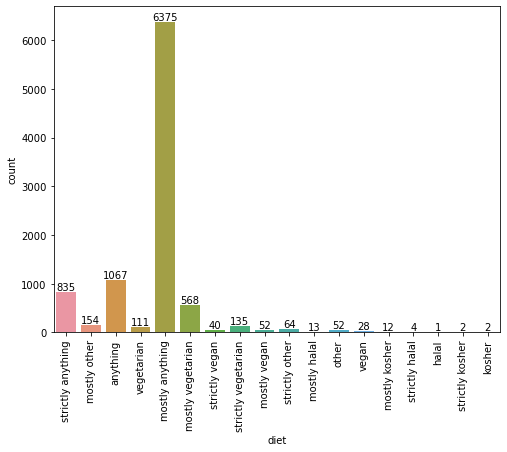

In [25]:
fillmode('diet')

In [26]:
data.diet.value_counts()

mostly anything        6375
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [27]:
d1 = {
    'halal': ['mostly halal', 'strictly halal', 'halal', 'mostly kosher', 'strictly kosher', 'kosher', 'strictly vegan', 'strictly vegetarian', 'vegetarian', 'vegan'],
    'other': ['mostly anything', 'anything', 'strictly anything', 'mostly vegetarian', 'mostly other', 'strictly other', 'mostly vegan', 'other']
}

data['diet'] = data['diet'].map({value: key for key, values in d1.items() for value in values})
data.diet.isnull().sum()

0

In [28]:
data.diet

0       other
1       other
2       other
3       halal
4       other
        ...  
9510    other
9511    other
9512    other
9513    other
9514    other
Name: diet, Length: 9515, dtype: object

In [29]:
data.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,average,other,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,other,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,halal,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,other,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## drink column

In [30]:
data.drinks.value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

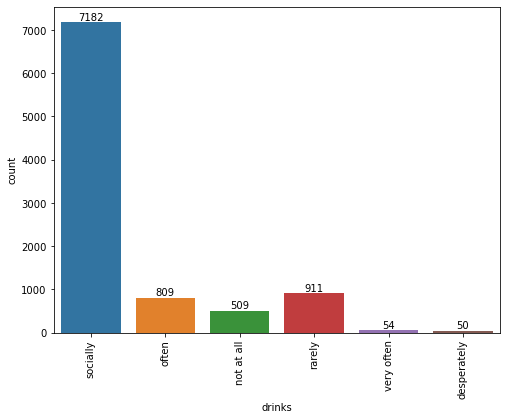

In [31]:
fillmode('drinks')

In [32]:
d2 = {
    'not at all': 0,
    'rarely': 1,
    'socially': 2,
    'often': 3,
    'very often': 4,
    'desperately': 5
}

# Sıklık değerlerini sayısal değerlere dönüştürme
data['drinks'] = data['drinks'].map(d2)

In [33]:
data.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,average,other,2,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,other,3,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,other,2,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,halal,2,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,other,2,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## drugs column

In [34]:
data.drugs.value_counts()

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

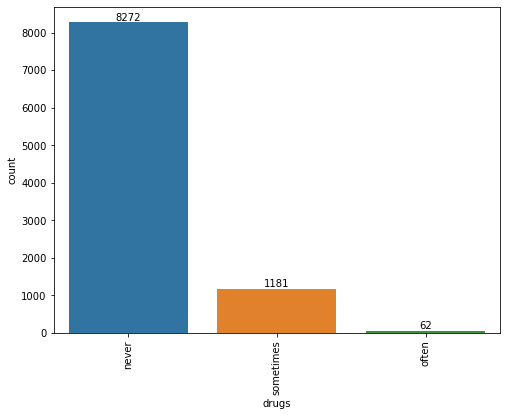

In [35]:
fillmode('drugs')

In [36]:
d3 = {'never' : 0, 'sometimes' : 1, 'often' : 2}
data['drugs'] = data['drugs'].map(d3)

## education column

In [37]:
data.education.value_counts()  # cok uzun silicem bu sutunu

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [38]:
data = data.drop('education', axis = 1)

## ethnicity column

In [39]:
data.ethnicity.nunique()   # cok fazla farklı deger olduğu için bunu da silicem.

112

In [40]:
data = data.drop('ethnicity', axis = 1)

## job column

In [41]:
data.job.value_counts()

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

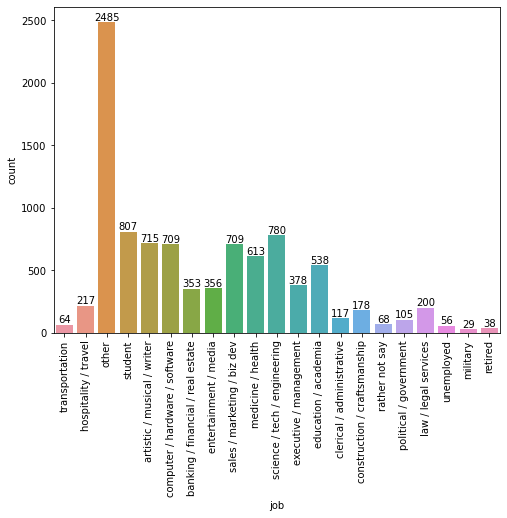

In [42]:
fillmode('job')

## location column

In [43]:
data = data.drop(data.index[-1])  # duplicate ederken son satır kalmış onu atalım.

In [44]:
data.location.value_counts()

san francisco, california          4835
oakland, california                1181
berkeley, california                768
san mateo, california               207
palo alto, california               170
alameda, california                 155
san rafael, california              134
emeryville, california              117
redwood city, california            115
walnut creek, california            112
hayward, california                 112
menlo park, california               97
daly city, california                95
san leandro, california              94
vallejo, california                  90
richmond, california                 67
el cerrito, california               64
burlingame, california               63
novato, california                   59
mountain view, california            56
pleasant hill, california            53
south san francisco, california      53
stanford, california                 53
castro valley, california            51
pacifica, california                 48


In [45]:
data.location = data.location.str.replace('[^\w\s]', '')
data.location.value_counts()

san francisco california          4835
oakland california                1181
berkeley california                768
san mateo california               207
palo alto california               170
alameda california                 155
san rafael california              134
emeryville california              117
redwood city california            115
walnut creek california            112
hayward california                 112
menlo park california               97
daly city california                95
san leandro california              94
vallejo california                  90
richmond california                 67
el cerrito california               64
burlingame california               63
novato california                   59
mountain view california            56
pleasant hill california            53
south san francisco california      53
stanford california                 53
castro valley california            51
pacifica california                 48
san carlos california    

In [46]:
for i in range(len(data['location'])):
    if 'california' in data['location'][i].lower():
        data['location'][i] = 'california'
    elif 'york' in data['location'][i].lower():
        data['location'][i] = 'new york'
    else:
        data['location'][i] = 'other'

In [47]:
data.location.value_counts()

california    9504
other            9
new york         1
Name: location, dtype: int64

## offspring column

In [48]:
data.offspring.value_counts()

doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: offspring, dtype: int64

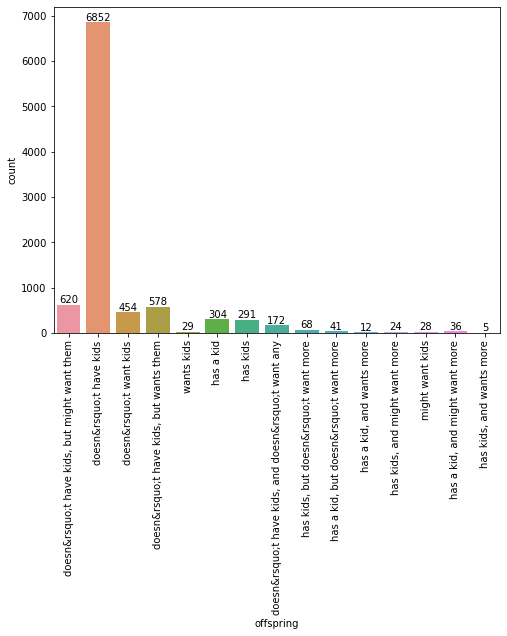

In [49]:
fillmode('offspring')

In [50]:
d4 = {
    'kid': ['has a kid', 'has kids', 'has kids, but doesn&rsquo;t want more', 'has a kid, but doesn&rsquo;t want more', 
            'has a kid, and might want more', 'wants kids', 'might want kids', 'has kids, and might want more', 'has a kid, and wants more', 'has kids, and wants more'],
    'no_kids': ['doesn&rsquo;t have kids', 'doesn&rsquo;t have kids, but might want them', 'doesn&rsquo;t have kids, but wants them', 'doesn&rsquo;t want kids']
}

data['offspring'] = data['offspring'].map({value: key for key, values in d4.items() for value in values})
data.offspring.isnull().sum()

172

In [51]:
data.offspring.nunique()

2

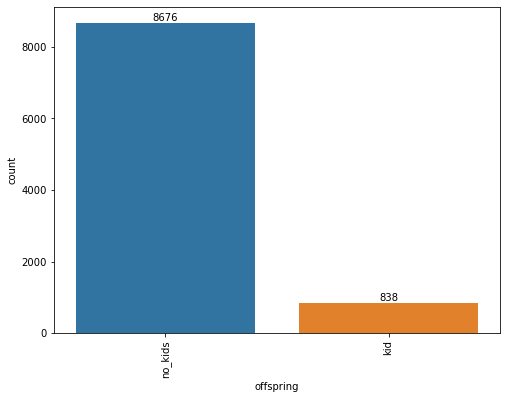

In [52]:
fillmode('offspring')

### orientation column

In [59]:
data.orientation.value_counts()

straight    8191
gay          897
bisexual     426
Name: orientation, dtype: int64

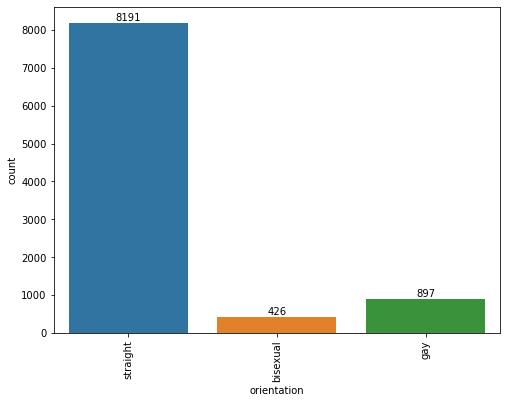

In [60]:
fillmode('orientation')

In [61]:
data.orientation.isna().sum()

0

## pets column

In [64]:
data.pets.value_counts()

likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: pets, dtype: int64

In [65]:
d5 = {
    'like_cats': ['has cats', 'likes cats', 'dislikes dogs and likes cats', 'dislikes dogs', 'dislikes dogs and has cats '],
    'like_dogs': ['likes dogs', 'has dogs', 'has dogs and dislikes cats', 'dislikes cats', 'likes dogs and dislikes cats'],
    'like_boths' : ['likes dogs and likes cats', 'likes dogs and has cats', 'has dogs and likes cats', 'has dogs and has cats'],
    'dislike' : ['dislikes dogs and dislikes cats']
    
}

data['pets'] = data['pets'].map({value: key for key, values in d5.items() for value in values})
data.pets.isnull().sum()

3175

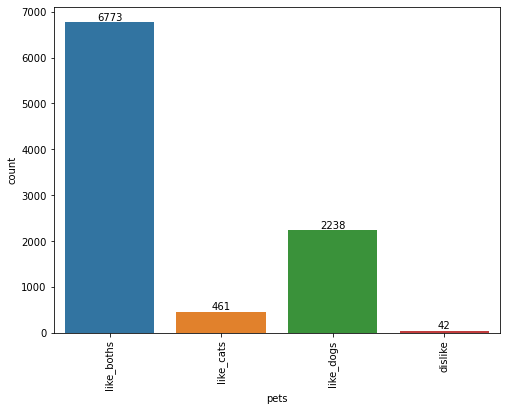

In [66]:
fillmode('pets')

## religion column

In [70]:
data.religion.value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


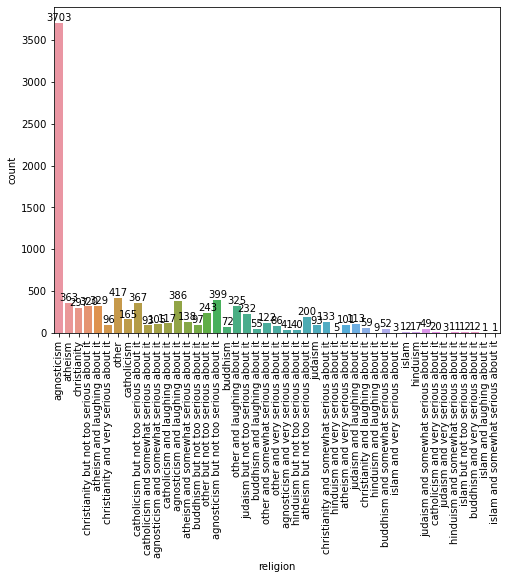

In [75]:
fillmode('religion')

In [76]:
for i in range(len(data['religion'])):
    if 'agnosticism' in data['religion'][i].lower():
        data['religion'][i] = 'agnosticism'
        
    elif 'catholicism' in data['religion'][i].lower():
        data['religion'][i] = 'catholicism'
        
    elif 'atheism' in data['religion'][i].lower():
        data['religion'][i] = 'atheism'
        
    elif 'christianity' in data['religion'][i].lower():
        data['religion'][i] = 'christianity'
        
    elif 'judaism' in data['religion'][i].lower():
        data['religion'][i] = 'judaism'
        
    elif 'catholicism' in data['religion'][i].lower():
        data['religion'][i] = 'catholicism'
        
    elif 'buddhism' in data['religion'][i].lower():
        data['religion'][i] = 'buddhism'
        
    elif 'hinduism' in data['religion'][i].lower():
        data['religion'][i] = 'hinduism'
        
    elif 'islam' in data['religion'][i].lower():
        data['religion'][i] = 'islam'
    
    else:
        data['location'][i] = 'other'

In [115]:
data.religion.value_counts()

agnosticism                            4634
atheism                                1131
christianity                            905
catholicism                             762
judaism                                 490
other                                   417
other and laughing about it             325
buddhism                                288
other but not too serious about it      243
other and somewhat serious about it     122
other and very serious about it          86
hinduism                                 82
islam                                    29
Name: religion, dtype: int64

In [78]:
data.sample(5)

,age,body_type,diet,drinks,drugs,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
6745,26.0,average,other,2,0,65.0,-1.0,other,2012-06-25-21-00,california,no_kids,straight,like_cats,catholicism,f,virgo but it doesn&rsquo;t matter,no,"english, italian (poorly)",single
547,25.0,fit,other,2,2,70.0,-1.0,rather not say,2012-06-29-11-03,california,no_kids,straight,like_boths,agnosticism,m,aquarius,trying to quit,english,single
8888,39.0,average,other,2,0,63.0,-1.0,other,2012-06-29-19-59,california,no_kids,gay,like_boths,agnosticism,f,taurus and it&rsquo;s fun to think about,no,english,single
1187,19.0,fit,other,2,1,59.0,-1.0,student,2012-06-29-22-56,california,no_kids,straight,like_dogs,agnosticism,f,capricorn and it matters a lot,no,english,single
8914,28.0,fit,other,2,0,72.0,-1.0,science / tech / engineering,2012-06-29-20-37,california,no_kids,straight,like_boths,catholicism,m,scorpio and it&rsquo;s fun to think about,no,"english (fluently), spanish (okay), chinese (p...",single


In [79]:
## data.to_csv('son_part.csv', index = False)

In [80]:
data = pd.read_csv('son_part.csv')

## sex column

In [82]:
data.sex.value_counts()

m    5675
f    3839
Name: sex, dtype: int64

In [83]:
data.sex.isnull().sum()

0

## sign column

In [84]:
data.sign.value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

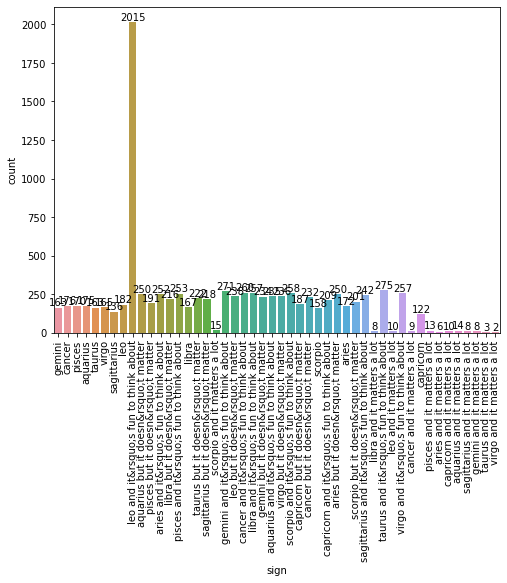

In [86]:
fillmode('sign')

In [87]:
for i in range(len(data['sign'])):
    
    if 'aries' in data['sign'][i].lower():
        data['sign'][i] = 'aries'
        
    elif 'leo' in data['sign'][i].lower():
        data['sign'][i] = 'leo'
        
    elif 'sagittarius' in data['sign'][i].lower():
        data['sign'][i] = 'sagittarius'
        
    elif 'taurus' in data['sign'][i].lower():
        data['sign'][i] = 'taurus'
        
    elif 'virgo' in data['sign'][i].lower():
        data['sign'][i] = 'virgo'
        
    elif 'capricorn' in data['sign'][i].lower():
        data['sign'][i] = 'capricorn'
        
    elif 'gemini' in data['sign'][i].lower():
        data['sign'][i] = 'gemini'
        
    elif 'libra' in data['sign'][i].lower():
        data['sign'][i] = 'libra'
        
    elif 'aquarius' in data['sign'][i].lower():
        data['sign'][i] = 'aquarius'
        
    elif 'cancer' in data['sign'][i].lower():
        data['sign'][i] = 'cancer'
        
    elif 'scorpio' in data['sign'][i].lower():
        data['sign'][i] = 'scorpio' 
        
    else:
        data['sign'][i] = 'pisces'

## smokes column

In [89]:
data.smokes.value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

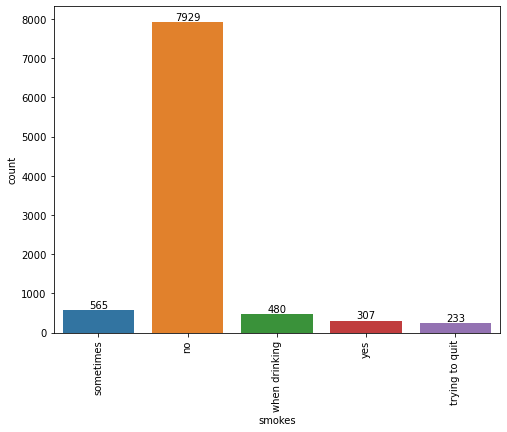

In [91]:
fillmode('smokes')

In [92]:
data.smokes.isnull().sum()

0

In [93]:
d6 = {'no' : 0, 'sometimes' : 1, 'when drinking' : 2, 'trying to quit' : 3, 'yes' : 4}
data.smokes = data.smokes.map(d6)

## speaks column

In [96]:
data.speaks.isnull().sum()

6

In [100]:
data.speaks.nunique()

1794

In [102]:
data.speaks.value_counts()

english                                                                                3421
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                             

In [104]:
for i in range(len(data['speaks'])):
    
    if 'english' in data['speaks'][i].lower():
        data['speaks'][i] = 'enlish'

In [105]:
data.speaks.value_counts()   # herkes ingilizce konusabiliyor o yuzden bu sutunu da silicem.

enlish    9514
Name: speaks, dtype: int64

In [106]:
data.drop('speaks', axis = 1, inplace = True)

In [107]:
data.head()

,age,body_type,diet,drinks,drugs,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status
0,22.0,average,other,2,0,75.0,-1.0,transportation,2012-06-28-20-30,california,no_kids,straight,like_boths,agnosticism,m,gemini,1,single
1,35.0,average,other,3,1,70.0,80000.0,hospitality / travel,2012-06-29-21-41,california,no_kids,straight,like_boths,agnosticism,m,cancer,0,single
2,38.0,fit,other,2,0,68.0,-1.0,other,2012-06-27-09-10,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,available
3,23.0,fit,halal,2,0,71.0,20000.0,student,2012-06-28-14-22,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,single
4,29.0,fit,other,2,0,66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,california,no_kids,straight,like_boths,agnosticism,m,aquarius,0,single


## status column

In [108]:
data.status.value_counts()

single            8909
seeing someone     289
available          270
married             46
Name: status, dtype: int64

In [109]:
data.status.isna().sum()

0

## income kucuk bir değişiklik

In [110]:
data.loc[data['income'] == -1, 'income'] = 0   ## -1 olan degerleri 0 ile değiştirdik.

In [111]:
data.head()

,age,body_type,diet,drinks,drugs,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status
0,22.0,average,other,2,0,75.0,0.0,transportation,2012-06-28-20-30,california,no_kids,straight,like_boths,agnosticism,m,gemini,1,single
1,35.0,average,other,3,1,70.0,80000.0,hospitality / travel,2012-06-29-21-41,california,no_kids,straight,like_boths,agnosticism,m,cancer,0,single
2,38.0,fit,other,2,0,68.0,0.0,other,2012-06-27-09-10,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,available
3,23.0,fit,halal,2,0,71.0,20000.0,student,2012-06-28-14-22,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,single
4,29.0,fit,other,2,0,66.0,0.0,artistic / musical / writer,2012-06-27-21-26,california,no_kids,straight,like_boths,agnosticism,m,aquarius,0,single


## last_online column

In [112]:
data.last_online.value_counts()

2012-06-29-22-56    15
2012-06-29-22-33    11
2012-06-29-22-35    11
2012-06-29-22-58    11
2012-06-29-22-55    10
                    ..
2012-06-27-08-27     1
2011-09-12-13-24     1
2012-06-22-17-55     1
2012-04-17-11-29     1
2012-06-14-15-14     1
Name: last_online, Length: 6763, dtype: int64

In [114]:
data['year'] = 2023 - data['last_online'].str[:4].astype(int)
data['month'] = data['last_online'].str[5:7].astype(int)

In [118]:
data.drop('last_online', axis = 1, inplace = True)
data

,age,body_type,diet,drinks,drugs,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,status,year,month
0,22.0,average,other,2,0,75.0,0.0,transportation,california,no_kids,straight,like_boths,agnosticism,m,gemini,1,single,11,6
1,35.0,average,other,3,1,70.0,80000.0,hospitality / travel,california,no_kids,straight,like_boths,agnosticism,m,cancer,0,single,11,6
2,38.0,fit,other,2,0,68.0,0.0,other,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,available,11,6
3,23.0,fit,halal,2,0,71.0,20000.0,student,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,single,11,6
4,29.0,fit,other,2,0,66.0,0.0,artistic / musical / writer,california,no_kids,straight,like_boths,agnosticism,m,aquarius,0,single,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,other,2,0,73.0,60000.0,medicine / health,california,no_kids,straight,like_boths,christianity,m,aries,0,single,11,6
9510,31.0,fit,other,2,1,72.0,0.0,hospitality / travel,california,no_kids,gay,like_boths,atheism,m,scorpio,1,single,11,4
9511,34.0,average,other,2,0,71.0,0.0,hospitality / travel,california,no_kids,gay,like_boths,atheism,m,leo,2,single,11,4
9512,29.0,fit,other,1,0,70.0,0.0,other,california,no_kids,gay,like_boths,agnosticism,m,aries,0,single,11,3


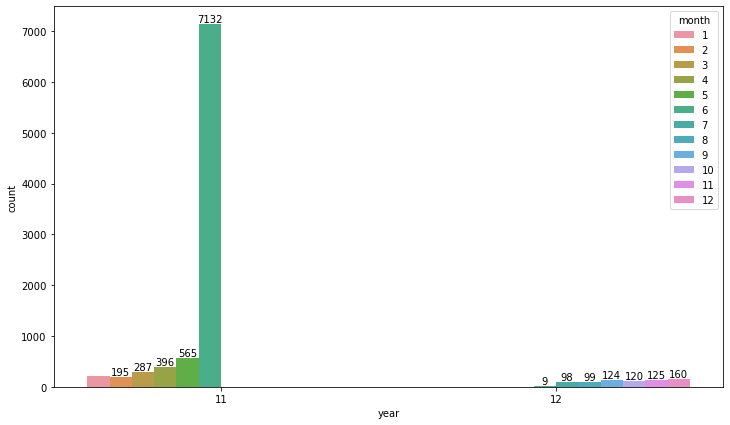

In [124]:
plt.figure(figsize = (12, 7))
ax = sbn.countplot(x = data['year'], hue = data['month'])
for i in range(1, 12):
    ax.bar_label(ax.containers[i]);

## yaşa gore sınıflandıralım.

In [126]:
## Millennial, Gen X-er, Boomers
def generation(age):
    if age >= 18 and age <= 32:
        return 'Millennials'
    elif age >= 33 and age <= 47:
        return 'Gen X-ers'
    else:
        return 'Boomers'

data['generation'] = data['age'].apply(generation)

In [127]:
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'income',
       'job', 'location', 'offspring', 'orientation', 'pets', 'religion',
       'sex', 'sign', 'smokes', 'status', 'year', 'month', 'generation'],
      dtype='object')

In [128]:
data

,age,body_type,diet,drinks,drugs,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,status,year,month,generation
0,22.0,average,other,2,0,75.0,0.0,transportation,california,no_kids,straight,like_boths,agnosticism,m,gemini,1,single,11,6,Millennials
1,35.0,average,other,3,1,70.0,80000.0,hospitality / travel,california,no_kids,straight,like_boths,agnosticism,m,cancer,0,single,11,6,Gen X-ers
2,38.0,fit,other,2,0,68.0,0.0,other,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,available,11,6,Gen X-ers
3,23.0,fit,halal,2,0,71.0,20000.0,student,california,no_kids,straight,like_cats,agnosticism,m,pisces,0,single,11,6,Millennials
4,29.0,fit,other,2,0,66.0,0.0,artistic / musical / writer,california,no_kids,straight,like_boths,agnosticism,m,aquarius,0,single,11,6,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,other,2,0,73.0,60000.0,medicine / health,california,no_kids,straight,like_boths,christianity,m,aries,0,single,11,6,Millennials
9510,31.0,fit,other,2,1,72.0,0.0,hospitality / travel,california,no_kids,gay,like_boths,atheism,m,scorpio,1,single,11,4,Millennials
9511,34.0,average,other,2,0,71.0,0.0,hospitality / travel,california,no_kids,gay,like_boths,atheism,m,leo,2,single,11,4,Gen X-ers
9512,29.0,fit,other,1,0,70.0,0.0,other,california,no_kids,gay,like_boths,agnosticism,m,aries,0,single,11,3,Millennials


## korelasyon

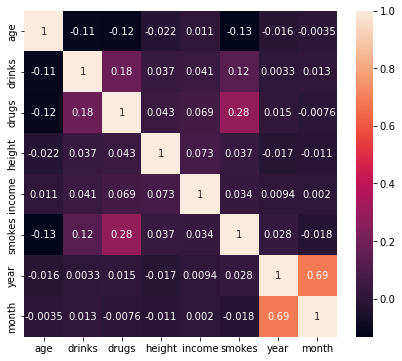

In [130]:
plt.figure(figsize = (7, 6))
sbn.heatmap(data.corr(), annot = True);

## Regression

In [132]:
x = data.drop('age', axis = 1)
y = data['age']

In [133]:
x = pd.get_dummies(x, drop_first = True)
x

,drinks,drugs,height,income,smokes,year,month,body_type_fit,body_type_overweight,diet_other,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,location_new york,location_other,offspring_no_kids,orientation_gay,orientation_straight,pets_like_boths,pets_like_cats,pets_like_dogs,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,religion_other and laughing about it,religion_other and somewhat serious about it,religion_other and very serious about it,religion_other but not too serious about it,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_virgo,status_married,status_seeing someone,status_single,generation_Gen X-ers,generation_Millennials
0,2,0,75.0,0.0,1,11,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,3,1,70.0,80000.0,0,11,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2,0,68.0,0.0,0,11,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2,0,71.0,20000.0,0,11,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,2,0,66.0,0.0,0,11,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,2,0,73.0,60000.0,0,11,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9510,2,1,72.0,0.0,1,11,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
9511,2,0,71.0,0.0,2,11,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
9512,1,0,70.0,0.0,0,11,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [135]:
def regression(x, y):
    lin = LinearRegression()
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    sup = SVR(kernel = "linear")
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
    ab = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    b = BaggingRegressor()
    ex = ExtraTreesRegressor()
    ext = ExtraTreeRegressor()
    hi = HistGradientBoostingRegressor()
    
    models = [lin, rid, las, ela, sup, ran, dec, ab, gb, b, ex, ext, hi]
    model_names = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T", 'AdaBoost', 'GradientBoost',
                  'Bagging', 'ExtraTrees', 'ExtraTree', 'HistGradient']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    r2 = []
    
    result = pd.DataFrame(columns = ["r2_score"], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        
               
    result["r2_score"] = r2
   
        
    return result.sort_values("r2_score", ascending = False) 

In [136]:
regression(x, y)

,r2_score
GradientBoost,85.582275
HistGradient,85.335278
Linear_R,85.333920
Ridge,85.331402
Support,84.790393
AdaBoost,84.273191
Random,83.331771
Bagging,81.857606
ExtraTrees,77.570488
Lasso,68.852132


## Classification

In [145]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = BernoulliNB()
    model5= GaussianNB()
    model6 = SVC()
    model7 = GradientBoostingClassifier()
    model8 = AdaBoostClassifier()
    model9 = HistGradientBoostingClassifier()
    model10 = BaggingClassifier()
    model11 = XGBClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]
    model_names = ['Logistic', 'Decision', 'Random', 'Bernoulli', 'Gaussian', 'Support', 'Gradient',
                  'AdaBoost', 'Hist', 'Bagging', 'XGBoost']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    acc = []
    skor = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
        
    skor['Accuracy'] = acc
    
    return skor.sort_values('Accuracy', ascending = False)

In [146]:
x1 = data.drop(['generation', 'age'], axis = 1)
y1 = data['generation']

In [147]:
x1 = pd.get_dummies(x1, drop_first = True)

In [148]:
y1 = y1.map({'Boomers' : 0, 'Gen X-ers' : 1, 'Millennials' : 2})

In [149]:
classification(x1, y1)

,Accuracy
Logistic,68.260641
Gradient,68.102995
AdaBoost,68.102995
Bernoulli,67.209669
Hist,66.316343
Support,66.263794
XGBoost,65.475565
Gaussian,64.214398
Random,64.109301
Bagging,58.854440
